### Loading the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


### Load the dataset

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Projects\Datasets\zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Basic info about dataset

In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## EDA 

In [8]:
df.drop('url',axis=1,inplace=True)

In [9]:
df['menu_item'].nunique()

9098

**Almost 76% of rows in 'menu_item column is an empty list.**

In [10]:
df['menu_item'].value_counts(normalize=True).sort_values(ascending=False)[:10]

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [11]:
df.drop('menu_item',axis=1,inplace=True)

In [12]:
x=df['online_order'].value_counts(normalize=True)
x

Yes    0.588665
No     0.411335
Name: online_order, dtype: float64

**People prefered ordering online more than actually dining out or going out to eat. Also 35% restaurants in Bangalore does not provide the service of online delivery.**

### People preference for Online Delivery

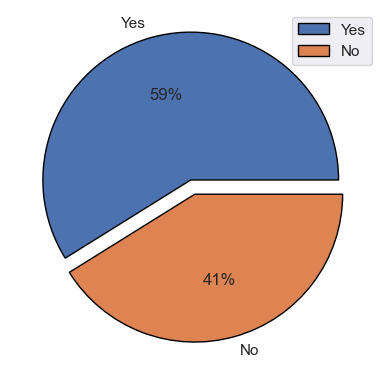

In [13]:
palette=sns.color_palette('deep')
plt.pie(x.values,labels=x.index,autopct='%.f%%',explode=[0.1,0.0],colors=palette,normalize=True,wedgeprops={'edgecolor':'black'})
plt.legend()
plt.show()

In [14]:
df.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [15]:
df.dropna(subset=['rate'],axis=0,inplace=True)

**After dropping the rows with no rating, the shape of our dataset is:**

In [16]:
df.shape

(43942, 15)

In [17]:
df['votes'].value_counts().sort_values(ascending=False)

0       2296
4       1133
6        989
7        872
9        738
        ... 
1262       1
2950       1
1284       1
2580       1
843        1
Name: votes, Length: 2325, dtype: int64

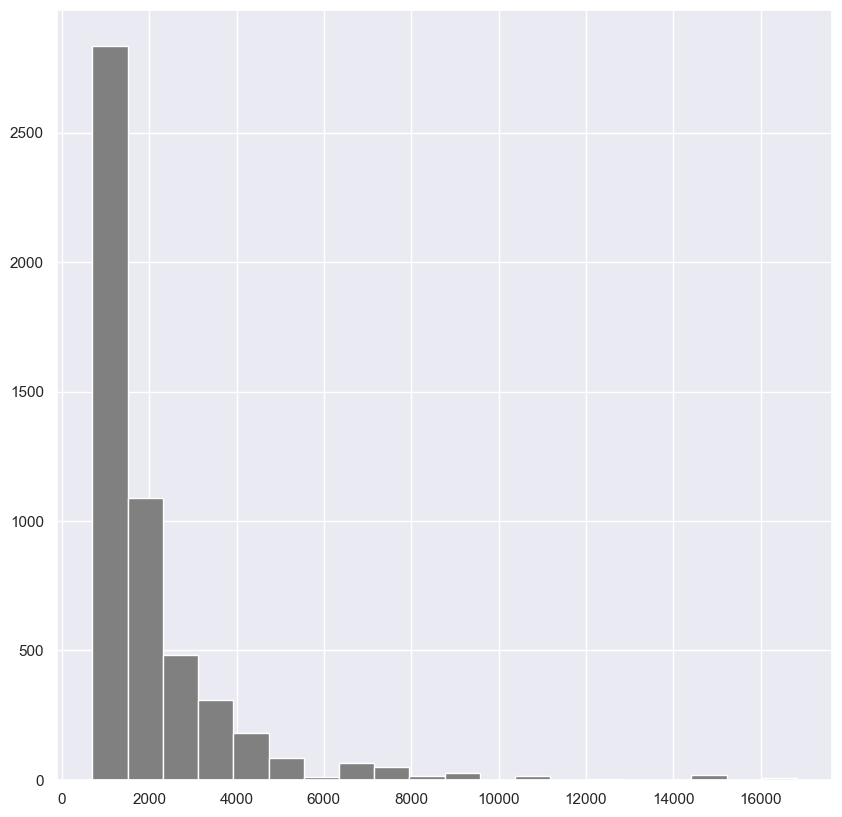

In [18]:
fig=plt.figure(figsize=(3,3))
df[df['votes']>700]['votes'].hist(bins=20,color='grey',figsize=(10,10))
plt.show()

**Most of the restaurants have not been voted even once**

In [19]:
df[['Rate','Out of']]=df['rate'].str.split(pat='/',n=1,expand=True)

In [20]:
df['address'].value_counts().sort_values(ascending=False)[:5]

Delivery Only                                                  95
The Ritz-Carlton, 99, Residency Road, Bangalore                61
Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore           49
14th Main, 4th Sector, HSR, Bangalore                          47
1, 100 Feet Ring Road, 1st Phase, 2nd Stage, BTM, Bangalore    43
Name: address, dtype: int64

In [21]:
df[df['address']=='The Ritz-Carlton, 99, Residency Road, Bangalore']['online_order'].value_counts()

No    61
Name: online_order, dtype: int64

**Restaurants in The Ritz-Carlton, 99, Residency Road, Bangalore were the most in demand by the people of Bangalore for the option of dining out.**

In [22]:
a=pd.DataFrame(df['location'].value_counts().sort_values(ascending=False)[:5])
a.rename(columns={'location':'count'},inplace=True)
a['location']=a.index
a.reset_index(inplace=True)
a.drop(['index'],inplace=True,axis=1)
a

,count,location
0,4261,BTM
1,2381,Koramangala 5th Block
2,2128,HSR
3,1936,Indiranagar
4,1849,JP Nagar


### Most Famous Restaurant Location 

<Figure size 1000x500 with 0 Axes>

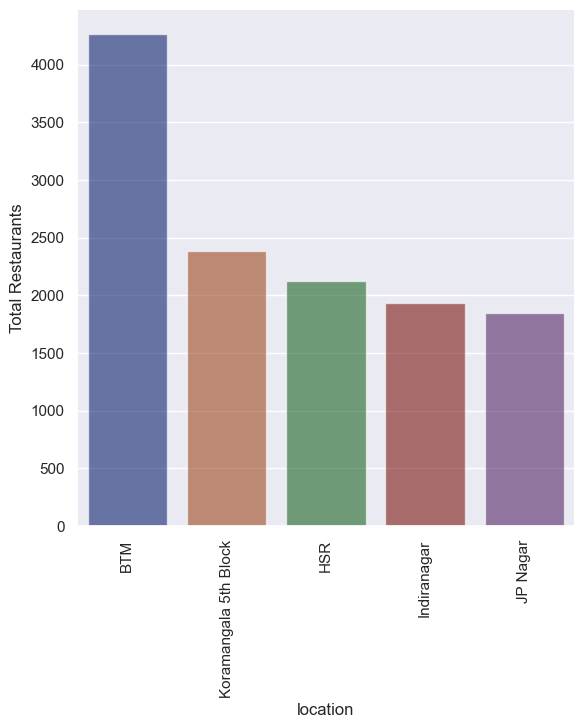

In [23]:
fig=plt.figure(figsize=(10,5))
g=sns.catplot(x='location',y='count',data=a,kind='bar',errorbar="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
plt.ylabel('Total Restaurants')
plt.xticks(rotation=90)
plt.show()

**Most of the online orders on Zomato were placed from restaurants in BTM, Bangalore.**

In [24]:
df[df['location']=='BTM']['online_order'].value_counts()

Yes    3058
No     1203
Name: online_order, dtype: int64

In [25]:
a=df['listed_in(type)'].value_counts()
a

Delivery              21863
Dine-out              14978
Desserts               2872
Cafes                  1604
Drinks & nightlife     1083
Buffet                  873
Pubs and bars           669
Name: listed_in(type), dtype: int64

In [26]:
l=['Delivery', 'Dine-out', 'Desserts', 'Cafes', 'Drinks & nightlife',
       'Buffet', 'Pubs and bars']

In [27]:
a.values

array([21863, 14978,  2872,  1604,  1083,   873,   669], dtype=int64)

**Ratio of Restaurants in Bangalore**

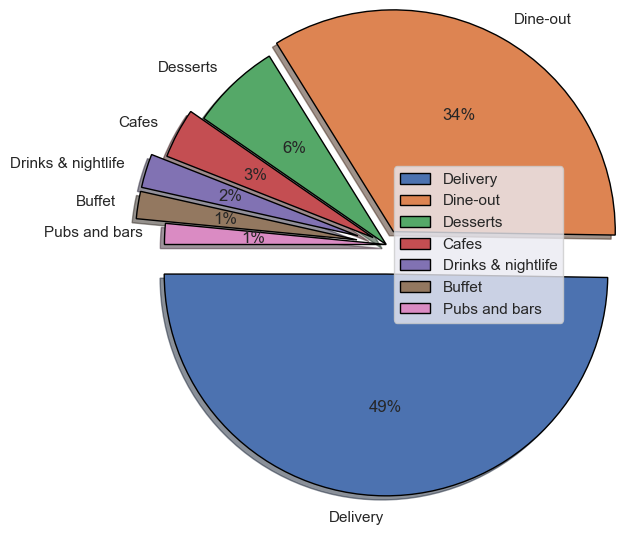

In [28]:
#fig=plt.figure(figsize=(7,7))
plt.pie(a.values,labels=l,radius=1.5,wedgeprops={'edgecolor':'black'},shadow=True,explode=[0.2,0.1,0,0.1,0.2,0.2,0],autopct='%d%%',startangle=180)
plt.legend(loc=5)
plt.show()

In [29]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Rate,Out of
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,5
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,5
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,5
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,5
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,5


In [30]:
df.drop(['rate','Out of'],axis=1,inplace=True)

In [31]:
df['Rating Out of 5']=pd.to_numeric(df['Rate'],errors='coerce')

In [32]:
df.head()

,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Rate,Rating Out of 5
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,4.1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,4.1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,3.8
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,3.7
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,3.8


In [33]:
df.duplicated().sum()

37

In [34]:
df.tail()

,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Rate,Rating Out of 5
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield,3.7,3.7
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,2.5,2.5
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,3.6,3.6
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,4.3,4.3
51716,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",Pubs and bars,Whitefield,3.4,3.4


In [35]:
t=df.groupby('online_order')['book_table'].value_counts()
t

online_order  book_table
No            No            12997
              Yes            2637
Yes           No            24512
              Yes            3796
Name: book_table, dtype: int64

**Most of the restaurants in Bangalore provided the service of online delivery while there was also many restaurants that neither provided online delivery nor prior reservation option.**

### Availibilty of Online Delivery and Reservation in Restaurants 

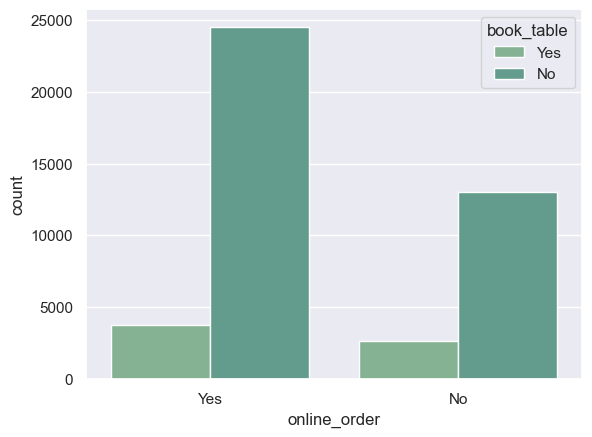

In [36]:
sns.countplot(x='online_order',data=df,hue='book_table',palette=sns.color_palette("crest"))
plt.show()

In [37]:
df.where(df['Rating Out of 5']>=3.5).sort_values(by='Rating Out of 5')[:10]

,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Rate,Rating Out of 5
20760,"158, 8th Main Road, 1st Stage, BTM Layout",Top Foam Parantha Roll & Juice Centre,No,No,13.0,+91 8792536494,BTM,Quick Bites,NaN,"North Indian, Chinese, Fast Food, Rolls",300,"[('Rated 4.0', 'RATED\n top foam was the best...",Delivery,Jayanagar,3.5,3.5
48360,"75, Near St Joseph's College Of Commerce, Mark...",The Jungle Terrace,Yes,No,13.0,+91 9880070925\n+91 9916211481,Brigade Road,Casual Dining,NaN,"Continental, Mexican, Lebanese",600,"[('Rated 4.0', 'RATED\n Good place and staff ...",Dine-out,Residency Road,3.5,3.5
28724,"32, BDA Complex, 3rd Block, Koramangala 3rd Bl...",Ambur Biryani,No,No,17.0,+91 9019866333,Koramangala 3rd Block,Quick Bites,NaN,"Biryani, Chinese",250,"[('Rated 3.5', 'RATED\n Hi,\nFirst of all I t...",Dine-out,Koramangala 4th Block,3.5,3.5
36966,"45, 3rd Main Road Ashwini layout, Ejipura, Ban...",Raj Rasoi,Yes,No,12.0,+91 9538818921\n+91 8073355342,Ejipura,Quick Bites,NaN,"North Indian, Chinese",250,"[('Rated 5.0', 'RATED\n The food was fresh, p...",Dine-out,Koramangala 7th Block,3.5,3.5
36963,"H-14, 1st Main, 80 Feet Road, KR Garden, Koram...",Taste of Nepal,Yes,No,26.0,+91 7996893079\n+91 9632887162,Koramangala 8th Block,Quick Bites,NaN,Chinese,300,"[('Rated 1.0', 'RATED\n One of the worst cafe...",Dine-out,Koramangala 7th Block,3.5,3.5
28729,"Innov 8, Koramangala 7th Block, State Bank of ...",Pappu Chaiwalla,Yes,No,10.0,+91 9632101377\r\r\n+91 9742620596,Koramangala 7th Block,Quick Bites,NaN,"Fast Food, Tea, Beverages",300,"[('Rated 4.0', 'RATED\n We got into this smal...",Dine-out,Koramangala 4th Block,3.5,3.5
48381,"6/A, Church Street, Bangalore",Funjabi,No,No,140.0,+91 9986185654,Church Street,Casual Dining,"Mango Lassi, Butter Chicken, Manchurian, Dehat...",North Indian,600,"[('Rated 4.0', 'RATED\n Mast funjabi. Nice fo...",Dine-out,Residency Road,3.5,3.5
48391,"54, The Monarch Hotels, Brigade Road, Bangalore",Monarch,No,No,10.0,080 42507000,Brigade Road,Casual Dining,NaN,"North Indian, Chinese, Continental, South Indian",700,"[('Rated 4.0', 'RATED\n A very centrally loca...",Dine-out,Residency Road,3.5,3.5
13208,"Radisson Blu, 1, Palace Road, Race Course Road...",Tea and Wine Lounge,No,No,10.0,080 22205205,Race Course Road,Cafe,NaN,"Cafe, Tea, Desserts",800,"[('Rated 4.5', 'RATED\n I was recently part o...",Dine-out,Church Street,3.5,3.5
13176,"23, 8th Main, Vasanth Nagar, Bangalore",Calcutta Chats,No,No,17.0,+91 8892697088,Vasanth Nagar,Quick Bites,NaN,"Street Food, North Indian",200,"[('Rated 3.5', 'RATED\n Crowded at peak times...",Dine-out,Church Street,3.5,3.5


In [38]:
df.drop('Rate',axis=1,inplace=True)

In [39]:
df.groupby('name').count().head()

,address,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Rating Out of 5
name,,,,,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,0,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [40]:
df['name'] = df['name'].str.replace('[Ãx][^A-Za-z]+','',regex=True)
df['name'] = df['name'].str.replace('Caf-|Caf ','Cafe ',regex=True)

In [41]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [42]:
x=df['rest_type'].value_counts().sort_values(ascending=False)[:10]
x

Quick Bites           15073
Casual Dining          9923
Cafe                   3527
Dessert Parlor         1939
Delivery               1791
Takeaway, Delivery     1472
Casual Dining, Bar     1141
Bakery                  775
Beverage Shop           704
Bar                     661
Name: rest_type, dtype: int64

### Most In-Demand Restaurant Type on Zomato 

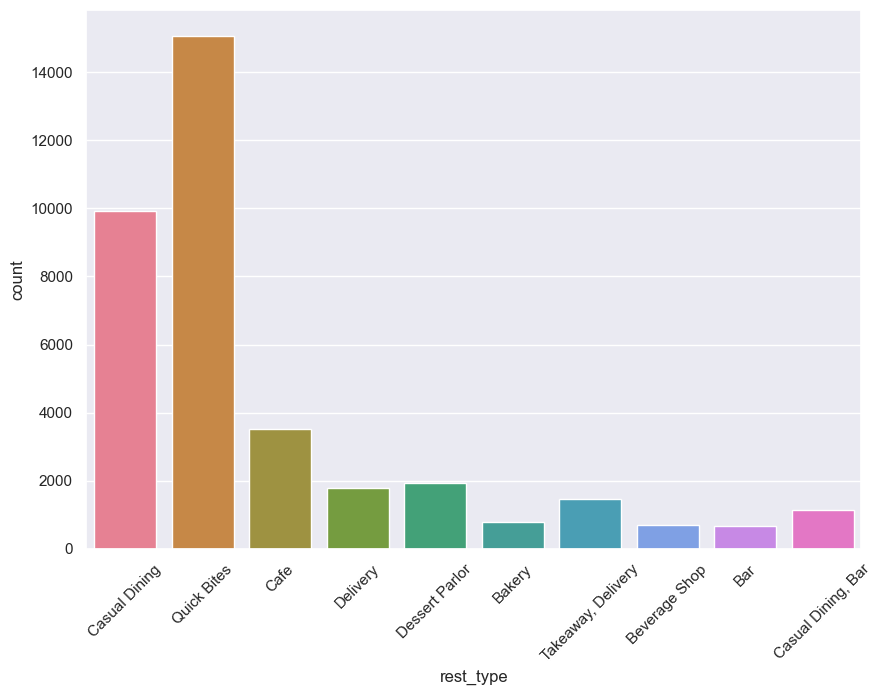

In [43]:
df1=df.loc[df['rest_type'].isin(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
                            'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop', 'Bar'])]
fig=plt.figure(figsize=(10,7))
sns.countplot(x='rest_type',data=df1,orient='v',palette='husl')
plt.xticks(rotation=45)
plt.show()

In [45]:
df.groupby('book_table').agg({'Rating Out of 5':'mean'})

,Rating Out of 5
book_table,
No,3.621470
Yes,4.143464


In [46]:
df.groupby('rest_type').agg({'Rating Out of 5':'max'})

,Rating Out of 5
rest_type,
Bakery,4.8
"Bakery, Beverage Shop",3.2
"Bakery, Cafe",4.4
"Bakery, Dessert Parlor",4.3
"Bakery, Food Court",3.2
...,...
"Quick Bites, Sweet Shop",4.2
Sweet Shop,4.4
"Sweet Shop, Quick Bites",4.3


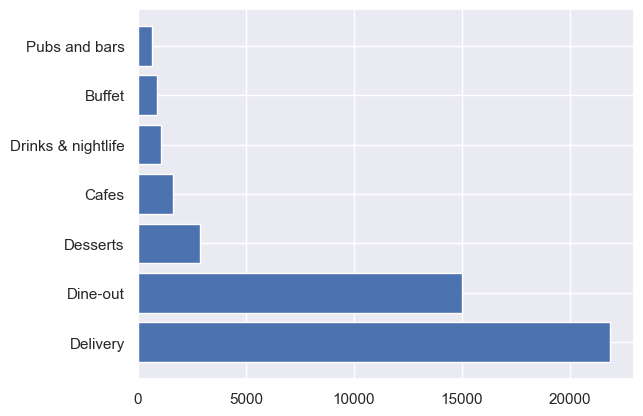

In [47]:
plt.barh(a.index,a.values)
plt.show()

<Axes: ylabel='rest_type'>

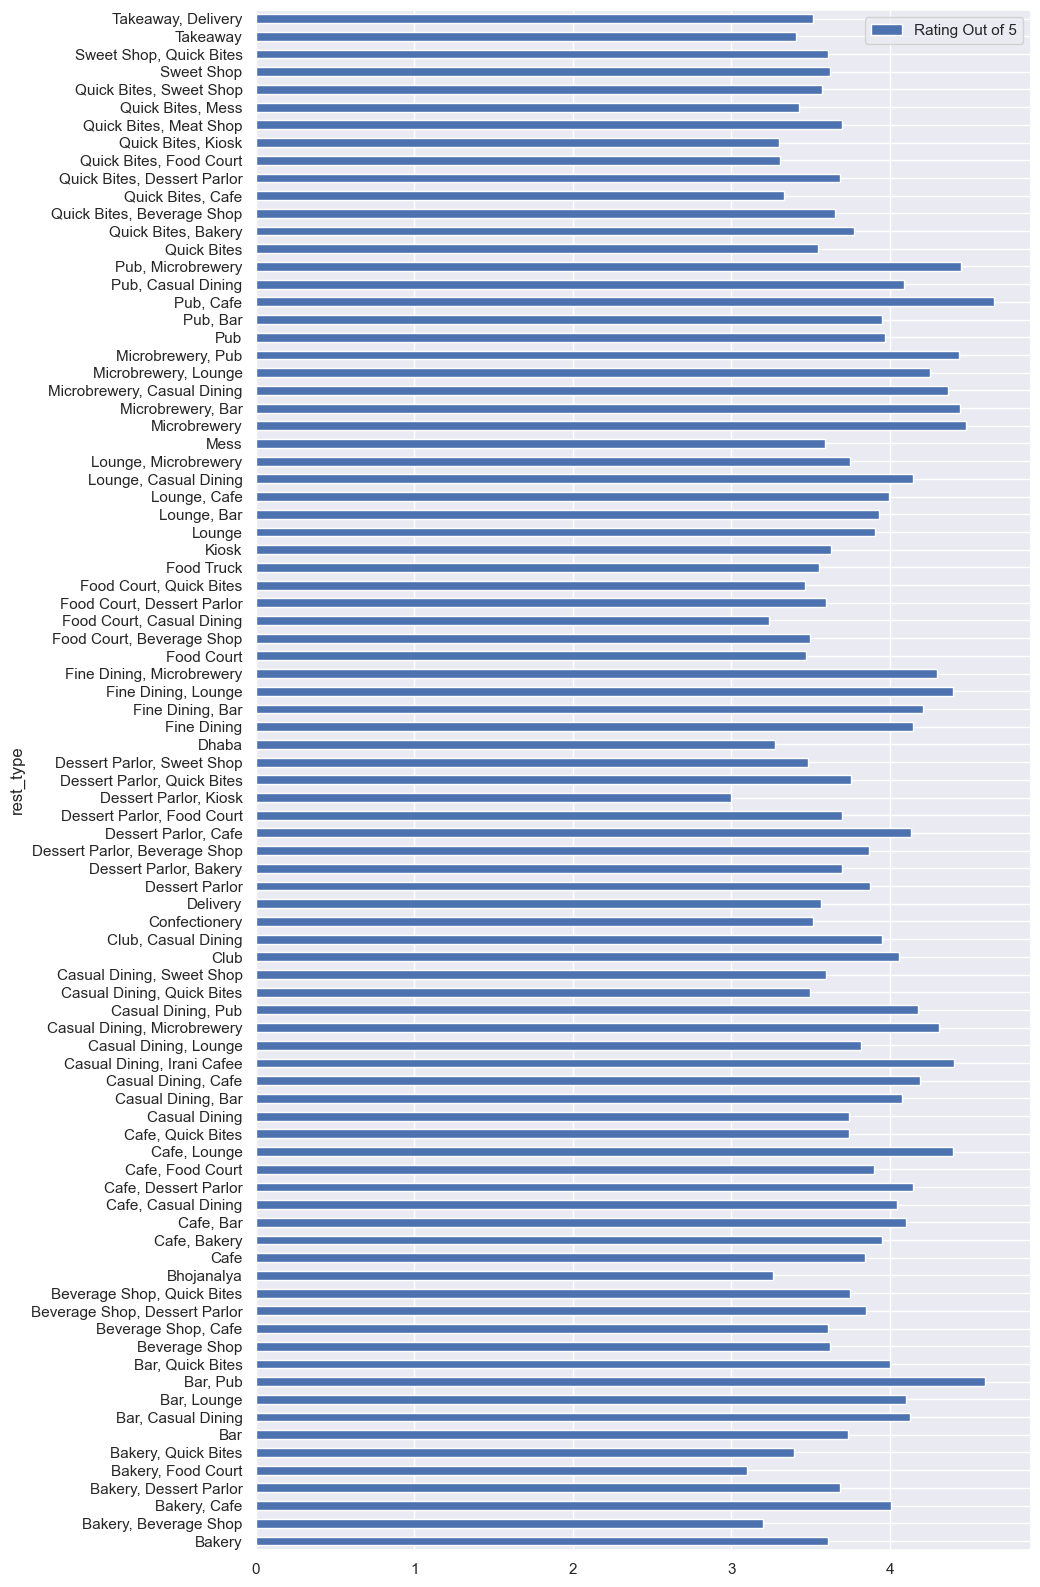

In [49]:
df.groupby('rest_type').agg({'Rating Out of 5':'mean'}).plot(kind='barh',figsize=(10,20))

In [50]:
df['cuisines'].value_counts()

North Indian                                                 2294
North Indian, Chinese                                        2060
South Indian                                                 1320
Cafe                                                          653
Bakery, Desserts                                              644
                                                             ... 
North Indian, Chinese, Continental, Italian, South Indian       1
Fast Food, Chinese, Burger, Hot dogs                            1
Hyderabadi, Andhra, Chinese, Biryani                            1
Sandwich, Salad, North Indian, Chinese                          1
North Indian, Chinese, Arabian, Momos                           1
Name: cuisines, Length: 2503, dtype: int64

In [51]:
q=df.groupby('name')['rest_type'].count()
plt.figure(figsize=[10,5])
tg=q.sort_values(ascending=False).head(20)
tg

name
Cafe Coffee Day      89
Onesta               85
Empire Restaurant    71
Five Star Chicken    68
Kanti Sweets         68
Just Bake            68
Petoo                64
Baskin Robbins       63
Pizza Hut            62
Polar Bear           61
Domino's Pizza       60
KFC                  60
Beijing Bites        60
Sweet Truth          60
Smoor                59
Subway               59
McDonald's           59
Faasos               57
Burger King          55
Keventers            54
Name: rest_type, dtype: int64

<Figure size 1000x500 with 0 Axes>

### Top 10 Restaurants that have the most Outlets in Bangalore

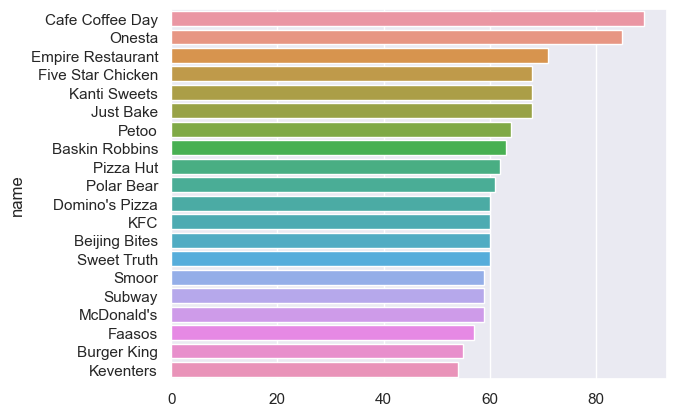

In [52]:
sns.barplot(y=tg.index,x=tg.values,orient='h')
plt.show()

In [53]:
df.groupby('name')['votes'].count().sort_values(ascending=False)[:10]

name
Cafe Coffee Day      89
Onesta               85
Empire Restaurant    71
Just Bake            68
Five Star Chicken    68
Kanti Sweets         68
Petoo                64
Baskin Robbins       63
Pizza Hut            62
Polar Bear           61
Name: votes, dtype: int64

<Axes: ylabel='name'>

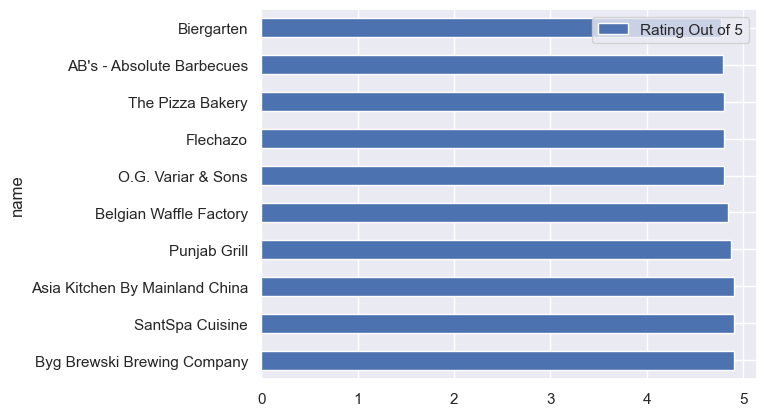

In [54]:
df.groupby('name').agg({'Rating Out of 5':'mean'}).sort_values('Rating Out of 5',ascending=False).head(10).plot(kind='barh')

In [55]:
df.groupby('listed_in(city)').agg({'Rating Out of 5':'median'})

,Rating Out of 5
listed_in(city),
BTM,3.7
Banashankari,3.7
Bannerghatta Road,3.6
Basavanagudi,3.8
Bellandur,3.7
Brigade Road,3.9
Brookefield,3.6
Church Street,3.9
Electronic City,3.5


In [56]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', nan, '2,200',
       '2,000', '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '360', '6,000',
       '1,050', '2,300', '4,100', '120', '5,000', '3,700', '1,650',
       '2,700', '4,500'], dtype=object)

In [57]:
df['approx_cost(for two people)']=pd.to_numeric(df['approx_cost(for two people)'],errors='coerce')

In [58]:
c=df.groupby('location').agg({'approx_cost(for two people)': 'mean'})
costly=c.sort_values(by='approx_cost(for two people)', ascending=False).head(20)
costly.reset_index(inplace=True)
costly

,location,approx_cost(for two people)
0,Rajarajeshwari Nagar,725.000000
1,Race Course Road,683.050847
2,Infantry Road,651.428571
3,Sankey Road,600.000000
4,Church Street,561.620795
5,Koramangala 3rd Block,552.654867
6,Koramangala 4th Block,534.462810
7,Sadashiv Nagar,528.750000
8,St. Marks Road,528.318584
9,Cunningham Road,523.381295


### Most Costly Location of Bangalore for Ordering Food for Two People 

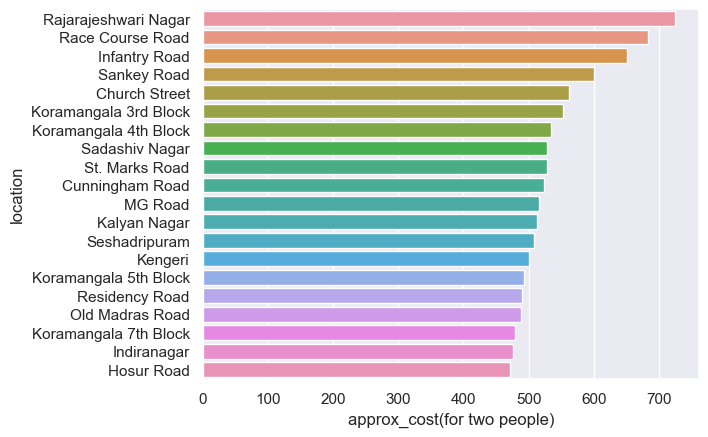

In [59]:
sns.barplot(x='approx_cost(for two people)',y='location',data=costly,orient='h')
plt.show()

In [116]:
df2=df.copy()
df2['cuisines']=df.cuisines.sort_values()
df2[['cuisines','Other']]=df['cuisines'].str.split(',',n=1,expand=True)
df2.head()

,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Rating Out of 5,Other
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",North Indian,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1,"Mughlai, Chinese"
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Chinese,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1,"North Indian, Thai"
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...",Cafe,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8,"Mexican, Italian"
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,South Indian,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7,North Indian
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",North Indian,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8,Rajasthani


In [110]:

# Assuming you have the following output
data = df['cuisines'].unique()

# Create a pandas Series with the data
output_series = pd.Series(data)

# Display the full output without truncation
print(output_series.to_string())


0                          North Indian, Mughlai, Chinese
1                             Chinese, North Indian, Thai
2                                  Cafe, Mexican, Italian
3                              South Indian, North Indian
4                                North Indian, Rajasthani
5                                            North Indian
6             North Indian, South Indian, Andhra, Chinese
7                                    Pizza, Cafe, Italian
8                              Cafe, Italian, Continental
9                Cafe, Mexican, Italian, Momos, Beverages
10                                                   Cafe
11                    Cafe, Chinese, Continental, Italian
12                                      Cafe, Continental
13           Cafe, Fast Food, Continental, Chinese, Momos
14                                 Chinese, Cafe, Italian
15                                Cafe, Italian, American
16                             Cafe, French, North Indian
17            

In [120]:
x=df2['cuisines'].value_counts().sort_values(ascending=False).head(15)
x

North Indian    10443
Cafe             4103
South Indian     3845
Chinese          2665
Biryani          2389
Fast Food        2043
Desserts         1791
Continental      1765
Bakery           1551
Andhra           1024
Beverages        1017
Kerala            803
Ice Cream         800
Street Food       731
Finger Food       677
Name: cuisines, dtype: int64

### Top Cuisines on Zomato 

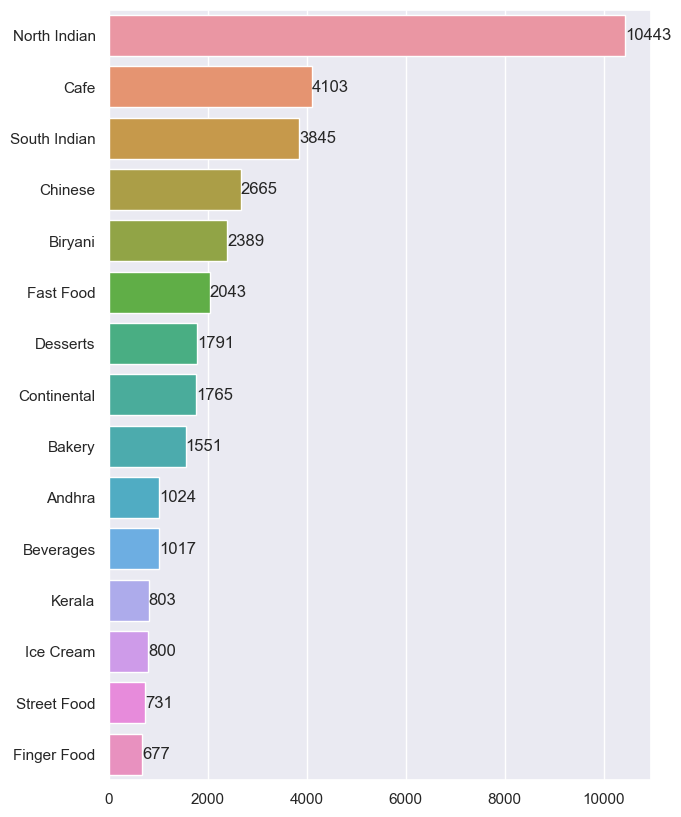

In [121]:
fig=plt.figure(figsize=(7,10))
ax=sns.barplot(x=x.values,y=x.index,orient='h')
ax.bar_label(ax.containers[0])
plt.show()